# Machine Learning Exam SoftUni 2018
# Radoslav Ivanov 
## Part 1
## Classification of red wines "good" or "not good"

I have used winequality-red.csv from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ to analyze data.
My task is to find good algorithm for classification of red wines, classified as 'good/1' and the rest classified as 'not good/0'.

I will use Decision tree, Random forest, Linear SVM, Gaussian SVM to find which algorithm perform best.
The column called "Quality" with value 7 or higher  will be classified as 'good/1' and the rest will be classified as 'not good/0'

Let's go.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score

### 1. Read the data

In [3]:
wine_data = None
wine_data = pd.read_csv("data\winequality-red.csv",delimiter=";")

In [4]:
wine_data.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
bins = [3,6,8]

quality_labels=[0,1]
wine_data['quality'] = pd.cut(wine_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)

In [6]:
wine_data.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [7]:
wine_data[wine_data['quality'] == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,1
16,8.5,0.280,0.56,1.80,0.092,35.0,103.0,0.99690,3.30,0.75,10.500000,1
37,8.1,0.380,0.28,2.10,0.066,13.0,30.0,0.99680,3.23,0.73,9.700000,1
62,7.5,0.520,0.16,1.90,0.085,12.0,35.0,0.99680,3.38,0.62,9.500000,1
128,8.0,0.590,0.16,1.80,0.065,3.0,16.0,0.99620,3.42,0.92,10.500000,1
198,5.4,0.835,0.08,1.20,0.046,13.0,93.0,0.99240,3.57,0.85,13.000000,1
200,9.6,0.320,0.47,1.40,0.056,9.0,24.0,0.99695,3.22,0.82,10.300000,1
205,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.800000,1
206,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.800000,1


In [8]:
wine_attributes = wine_data.drop("quality", axis = 1)
wine_labels = wine_data['quality'];
wine_attributes.shape

(1599, 11)

### 2. Normalize the data
Normalize the data for better performance

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1),)
scaler = scaler.fit(wine_attributes)
normalized = scaler.transform(wine_attributes)
wine_attributes = pd.DataFrame(normalized, columns = wine_attributes.columns)

### 3. Split the data

In [10]:
wine_attributes_train, wine_labels_train = None, None
wine_attributes_test, wine_labels_test = None, None
wine_attributes_train, wine_attributes_test, wine_labels_train, wine_labels_test = train_test_split(wine_attributes, wine_labels,
train_size = 0.7, test_size=0.3, stratify=wine_labels)

wine_attributes_test.shape

(480, 11)

### 4. Prepare the cross-validation folds

In [11]:
k_fold = StratifiedKFold(n_splits = 5)

### 5. Decision Tree

In [12]:
grid_param = {  
    'max_depth': [1, 5, 7, 15, 20],
    'min_samples_leaf': [2, 5, 10, 12],
    'max_leaf_nodes': [5, 10, 20]
}

clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf,  
                     param_grid=grid_param, cv = k_fold)

grid_search.fit(wine_attributes_train, wine_labels_train)

tree_classifier = grid_search.best_estimator_
print("Decision tree; best score:", grid_search.best_score_)

Decision tree; best score: 0.8748882931188561


### 6. Random Forest 

In [13]:
clf = RandomForestClassifier()

grid_param = {  
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 50, 100]
}

grid_search = GridSearchCV(estimator=clf,  
                     param_grid=grid_param, cv = k_fold)

grid_search.fit(wine_attributes_train, wine_labels_train)

forest_classifier = grid_search.best_estimator_

print("Random forest; best score:", grid_search.best_score_)

Random forest; best score: 0.9061662198391421


### 7. Linear SVM

In [14]:
clf = LinearSVC()

grid_param = {  
    'C': [0.1, 0.5, 0.8, 1, 1.5, 2, 6, 10, 15, 20]
}

grid_search = GridSearchCV(estimator=clf,  
                     param_grid=grid_param, cv = k_fold)

grid_search.fit(wine_attributes_train, wine_labels_train)

linear_svm_classifier = grid_search.best_estimator_

print("Linear SVM; best score:", grid_search.best_score_)

Linear SVM; best score: 0.8802502234137622


### 8. Gaussian SVM

In [15]:
clf = SVC()

grid_param = {  
    'C': [10, 15, 20, 50, 200],
    'gamma': [0.001, 0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=clf,  
                     param_grid=grid_param, cv = k_fold)

grid_search.fit(wine_attributes_train, wine_labels_train)

gaussian_svm_classifier = grid_search.best_estimator_

print("Gaussian SVM; best score:", grid_search.best_score_)

Gaussian SVM; best score: 0.8766756032171582


### 9. Cross-validation score for Random Forest 

In [16]:
scores = cross_val_score(forest_classifier, wine_attributes_train, wine_labels_train, cv = k_fold)
print(scores)

[0.90666667 0.89777778 0.88789238 0.90134529 0.9103139 ]


### 10. Compare performance on the testing data

In [17]:
tree_classifier_score = tree_classifier.score(wine_attributes_test,wine_labels_test)
forest_classifier_score = forest_classifier.score(wine_attributes_test,wine_labels_test)
linear_svm_classifier_score = linear_svm_classifier.score(wine_attributes_test,wine_labels_test)
gaussian_svm_classifier_score = gaussian_svm_classifier.score(wine_attributes_test,wine_labels_test)

print("Testing scores:")
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)
print("Linear SVM:", linear_svm_classifier_score)
print("Gaussian SVM:", gaussian_svm_classifier_score)

Testing scores:
Decision tree: 0.8625
Random forest: 0.9041666666666667
Linear SVM: 0.875
Gaussian SVM: 0.8708333333333333


### 11. Other score - F1 Score

In [18]:
tree_classifier_score = f1_score(wine_labels_test, tree_classifier.predict(wine_attributes_test),average='micro')
forest_classifier_score = f1_score(wine_labels_test, forest_classifier.predict(wine_attributes_test),average='micro')
linear_svm_classifier_score = f1_score(wine_labels_test, linear_svm_classifier.predict(wine_attributes_test),average='micro')
gaussian_svm_classifier_score = f1_score(wine_labels_test, gaussian_svm_classifier.predict(wine_attributes_test),average='micro')

print("Testing scores:")
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)
print("Linear SVM:", linear_svm_classifier_score)
print("Gaussian SVM:", gaussian_svm_classifier_score)

Testing scores:
Decision tree: 0.8625
Random forest: 0.9041666666666667
Linear SVM: 0.875
Gaussian SVM: 0.8708333333333333


### 12. ROC curve

In [19]:
probas_ = forest_classifier.predict_proba(wine_attributes_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(wine_labels_test, probas_[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)

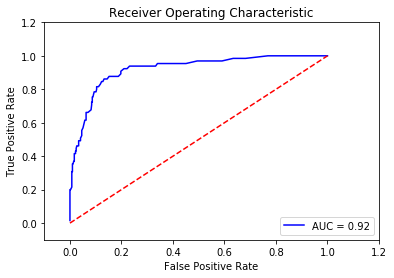

In [20]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 13. Confusion matrix

In [21]:
confusion_matrix(wine_labels_test, forest_classifier.predict(wine_attributes_test))

array([[404,  11],
       [ 35,  30]], dtype=int64)

### 14. Conclusion

After performing tests on  Decision Tree, Random Forest, Linear SVM and Gaussian SVM in the classification of Red Wines, it can be concluded that the best performer of the above mentioned is the Random Forest. Please, check below the respective results for all of the algorithms. The best score is 0.92 from Random Forest.

Decision tree: 0.89375
Random forest: 0.9145833333333333
Linear SVM: 0.8854166666666666
Gaussian SVM: 0.88125